# US Accidents Exploratory Data Analysis

## Download the Dataset

### Download the dataset from [here](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)

In [2]:
data_filename = 'US_Accidents_Dec20.csv'

## Data Preparation and Cleaning

In [3]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pip install folium --quiet
import folium
from folium.plugins import HeatMap

In [4]:
df = pd.read_csv(data_filename)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,A-24804,MapQuest,201.0,3,2016-10-16 10:45:48,2016-10-16 11:30:28,38.655796,-121.533295,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
24804,A-24805,MapQuest,201.0,2,2016-10-16 10:46:18,2016-10-16 11:15:55,37.829216,-121.210564,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
24805,A-24806,MapQuest,201.0,3,2016-10-16 10:57:17,2016-10-16 11:26:54,38.346191,-121.997261,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
24806,A-24807,MapQuest,201.0,3,2016-10-16 10:47:44,2016-10-16 11:32:24,38.643166,-121.434090,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24808 entries, 0 to 24807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     24808 non-null  object 
 1   Source                 24808 non-null  object 
 2   TMC                    24808 non-null  float64
 3   Severity               24808 non-null  int64  
 4   Start_Time             24808 non-null  object 
 5   End_Time               24808 non-null  object 
 6   Start_Lat              24807 non-null  float64
 7   Start_Lng              24807 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           24807 non-null  float64
 11  Description            24807 non-null  object 
 12  Number                 6582 non-null   float64
 13  Street                 24807 non-null  object 
 14  Side                   24807 non-null  object 
 15  Ci

In [6]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,24808.000000,24808.000000,24807.000000,24807.000000,0.0,0.0,24807.000000,6582.000000,24568.000000,2236.000000,24410.000000,24666.000000,24558.000000,19681.000000,2612.000000
mean,208.641164,2.381651,38.001768,-120.731134,NaN,NaN,0.018441,6775.037830,60.162968,35.417397,66.082302,30.017411,9.123467,8.550973,0.028323
std,18.244709,0.490262,0.648627,6.487108,NaN,NaN,0.307120,7364.486164,13.877511,9.081556,22.476991,0.232329,2.341611,4.677509,0.048672
min,200.000000,1.000000,36.352592,-123.813927,NaN,NaN,0.000000,1.000000,3.900000,-8.400000,4.000000,3.010000,0.100000,1.200000,0.000000
25%,201.000000,2.000000,37.575970,-122.202385,NaN,NaN,0.000000,1613.000000,51.100000,32.700000,51.000000,29.920000,10.000000,4.600000,0.000000
50%,201.000000,2.000000,37.876400,-121.922760,NaN,NaN,0.010000,4199.000000,59.000000,38.000000,69.000000,30.020000,10.000000,6.900000,0.010000
75%,201.000000,3.000000,38.496645,-121.415333,NaN,NaN,0.010000,8900.750000,68.000000,41.400000,83.000000,30.110000,10.000000,10.400000,0.040000
max,406.000000,4.000000,41.428753,-81.550728,NaN,NaN,24.040000,52664.000000,106.000000,66.000000,100.000000,33.040000,80.000000,142.700000,0.510000


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

In [8]:
numeric_df.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.01,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.01,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.01,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.01,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.01,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN


### Percentage of missing values per column

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  1.000000
End_Lng                  1.000000
Wind_Chill(F)            0.909868
Precipitation(in)        0.894711
Number                   0.734682
Wind_Speed(mph)          0.206667
Humidity(%)              0.016043
Weather_Condition        0.013262
Visibility(mi)           0.010077
Temperature(F)           0.009674
Pressure(in)             0.005724
Wind_Direction           0.004837
Weather_Timestamp        0.004837
Timezone                 0.000242
Airport_Code             0.000242
Zipcode                  0.000242
Nautical_Twilight        0.000040
Civil_Twilight           0.000040
Sunrise_Sunset           0.000040
Bump                     0.000040
Traffic_Calming          0.000040
Traffic_Signal           0.000040
Crossing                 0.000040
Give_Way                 0.000040
Amenity                  0.000040
No_Exit                  0.000040
Railway                  0.000040
Roundabout               0.000040
Turning_Loop             0.000040
Station       

In [10]:
type(missing_percentages)

pandas.core.series.Series

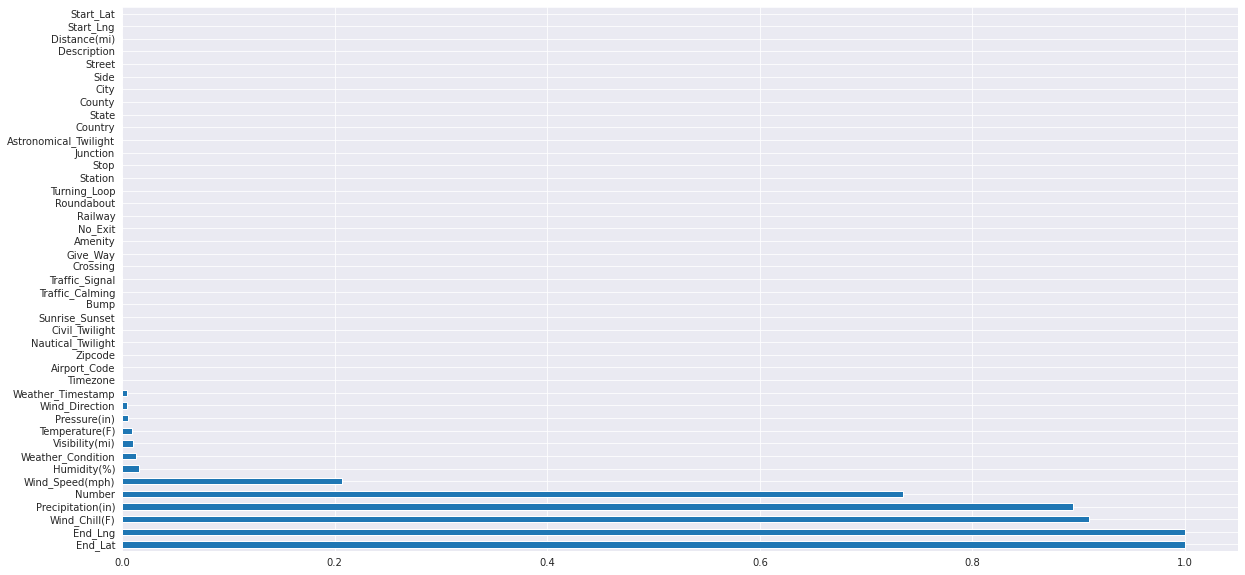

In [11]:
missing_percentages[missing_percentages != 0].plot(kind='barh', figsize=(20,10))

In [12]:
df.City

0              Dayton
1        Reynoldsburg
2        Williamsburg
3              Dayton
4              Dayton
             ...     
24803      Sacramento
24804         Manteca
24805       Vacaville
24806      Sacramento
24807             NaN
Name: City, Length: 24808, dtype: object

In [13]:
cities = df.City.unique()
len(cities)

441

In [14]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Sacramento       2792
San Jose         1689
Oakland          1054
San Francisco     737
Hayward           537
                 ... 
Frankfort           1
Brecksville         1
Urbancrest          1
Lewis Center        1
Inverness           1
Name: City, Length: 440, dtype: int64

In [15]:
cities_by_accident[:20]

Sacramento       2792
San Jose         1689
Oakland          1054
San Francisco     737
Hayward           537
Stockton          455
Tracy             439
Fremont           438
Santa Rosa        431
Livermore         383
Fairfield         369
Los Gatos         356
Dayton            321
San Mateo         296
Pleasanton        291
San Leandro       275
Castro Valley     263
Vallejo           262
Petaluma          238
Berkeley          238
Name: City, dtype: int64

In [16]:
type(cities_by_accident)

pandas.core.series.Series

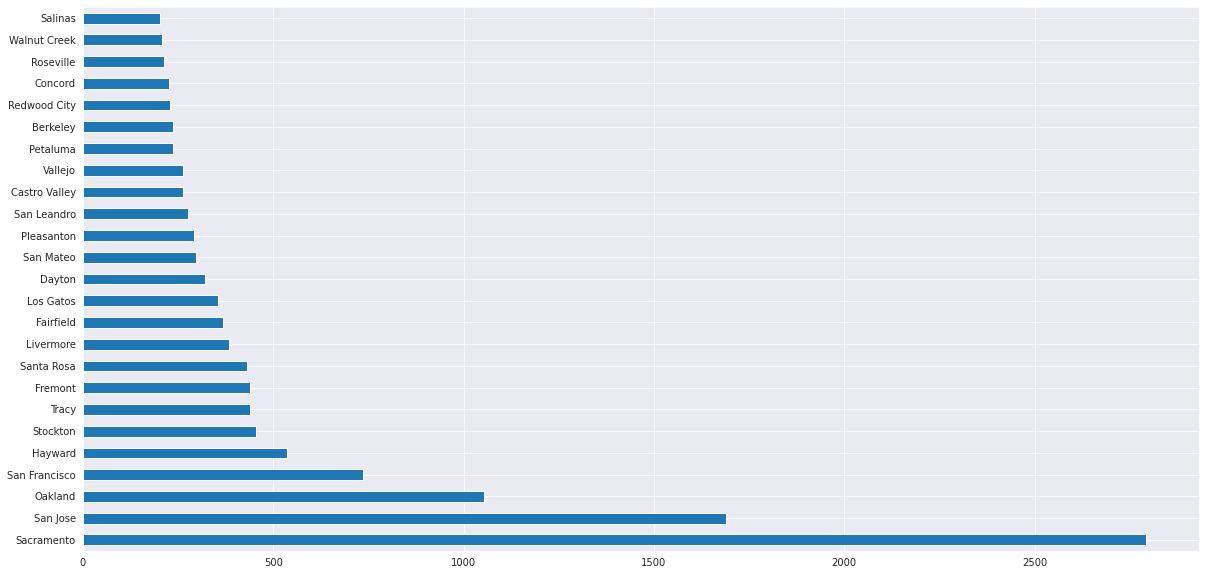

In [17]:
cities_by_accident[:25].plot(kind='barh', figsize=(20,10))

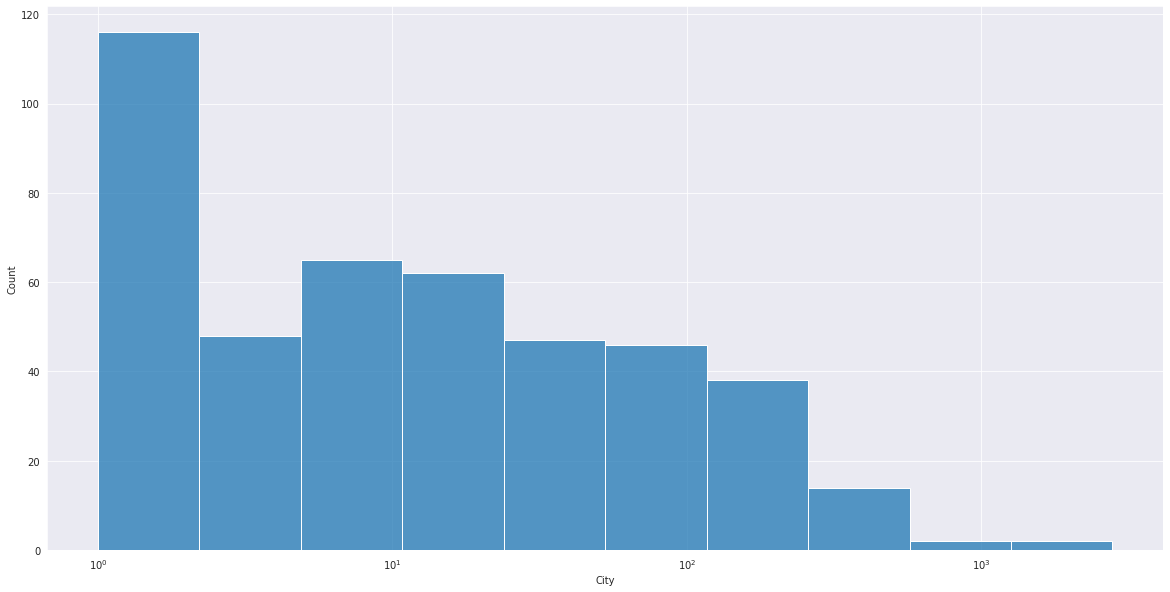

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(cities_by_accident, log_scale=True, ax=ax)

In [19]:
cities_by_accident[cities_by_accident == 1]

Gold Run        1
Big Sur         1
Palermo         1
Glenhaven       1
Woodacre        1
               ..
Frankfort       1
Brecksville     1
Urbancrest      1
Lewis Center    1
Inverness       1
Name: City, Length: 81, dtype: int64

In [20]:
df.Start_Time

0        2016-02-08 05:46:00
1        2016-02-08 06:07:59
2        2016-02-08 06:49:27
3        2016-02-08 07:23:34
4        2016-02-08 07:39:07
                ...         
24803    2016-10-16 10:45:48
24804    2016-10-16 10:46:18
24805    2016-10-16 10:57:17
24806    2016-10-16 10:47:44
24807    2016-10-16 11:15:03
Name: Start_Time, Length: 24808, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


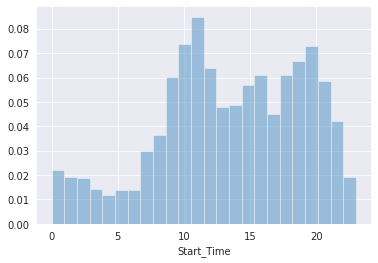

In [21]:
df.Start_Time = pd.to_datetime(df.Start_Time)

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

+ A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
+ Next higest percentage is 3 pm to 6 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


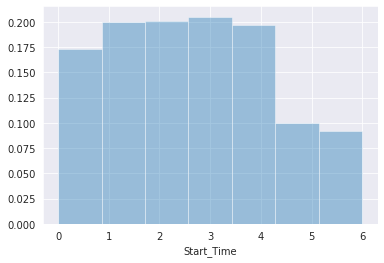

In [22]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


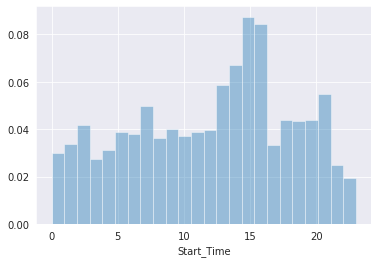

In [23]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


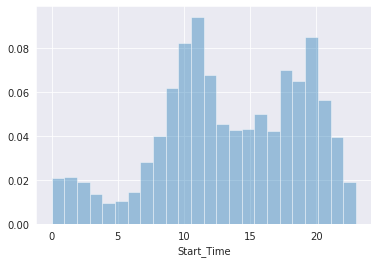

In [24]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [25]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


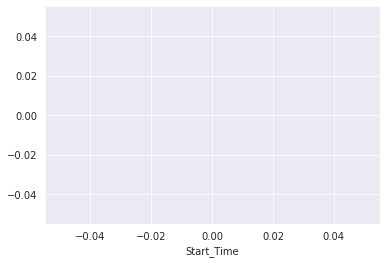

In [26]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)